# Lista 8 de exercícios - Visualização de dados

Chegamos à ultima lista de exercícios do nosso curso, do tema "Visualização de dados". Aqui, usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente. Importemos os dados:

In [2]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Baixando os dados
data = pd.read_csv("insurance.csv")

Breve descrição das colunas:


**age**: idade do beneficiário primário

**sex**: gênero do contratante 

**bmi**: índice de massa corporal (IMC)

**children**: número de crianças cobertas pelo plano / número de dependentes

**smoker**: fumante ("yes", se fumante; "no", se não fumante)

**region**: área residencial do paciente nos EUA: Nordeste (northeast), Sudeste (southeast), Sudoeste (southwest), Noroeste (northwest).

**charges**: custos médicos individuais cobrados pelo plano de saúde

Explorando os dados:

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data['age'].max()

64

In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exercícios:

### 1) Faça um gráfico para analisar a associação entre idade e cobrança do plano.

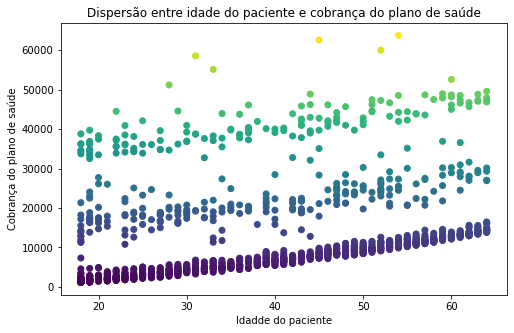

In [59]:
plt.figure(figsize = (8,5))
plt.scatter(data["age"], data["charges"], c = data["charges"])
plt.title("Dispersão entre idade do paciente e cobrança do plano de saúde")
plt.ylabel("Cobrança do plano de saúde")
plt.xlabel("Idadde do paciente")
plt.show()

### 2) 

#### a) Faça um gráfico para analisar a quantidade de fumantes e não-fumantes na amostra

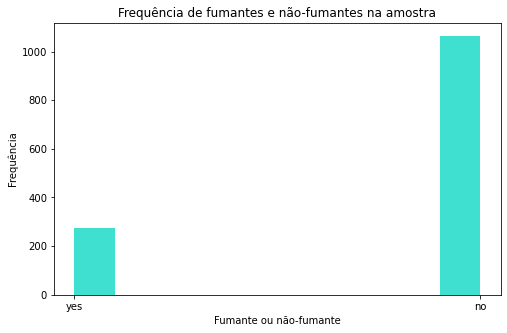

In [58]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize = (8,5))
plt.hist(data["smoker"], color = 'turquoise')
plt.xlabel("Fumante ou não-fumante")
plt.ylabel("Frequência")
plt.title("Frequência de fumantes e não-fumantes na amostra")
plt.show()

#### b) Agora, faça um gráfico para analisar a quantidade de homens e mulheres na amostra

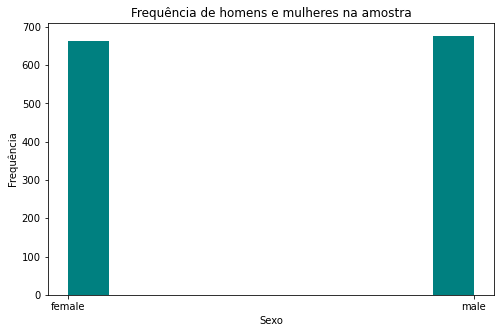

In [57]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize = (8,5))
plt.hist(data["sex"], color = 'teal')
plt.xlabel("Sexo")
plt.ylabel("Frequência")
plt.title("Frequência de homens e mulheres na amostra")
plt.show()

#### c) Por fim, faça um gráfico para analisar a quantidade de indivíduos de cada sexo em cada categoria de "smoker" (fumante)
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

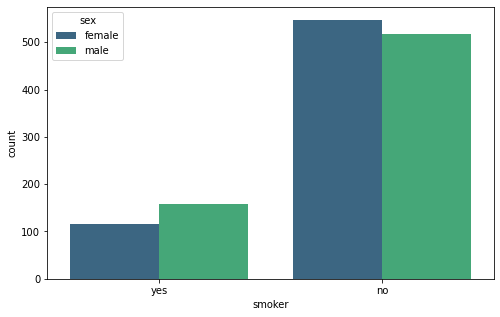

In [60]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.figure(figsize = (8,5))
sns.countplot(data=data, x="smoker", hue="sex", palette = "viridis")
plt.show()

### 3) Faça um gráfico que nos permita analisar a distribuição da cobrança do plano de saúde para cada região dos EUA

In [12]:
### SEU CÓDIGO COMEÇA AQUI ###
def cobranca_media(regiao, df = data):
    return np.mean(data[data["region"] == regiao]["charges"])

In [13]:
cobrancas_medias = {regiao: cobranca_media(regiao) for regiao in data["region"].unique()}

In [47]:
cobranca_regiao = pd.DataFrame.from_dict(cobrancas_medias, orient = "index", columns = ["Valor médio de cobrança"])

In [48]:
cobranca_regiao.head()

,Valor médio de cobrança
southwest,12346.937377
southeast,14735.411438
northwest,12417.575374
northeast,13406.384516


In [53]:
fig = px.histogram(cobranca_regiao, x=cobranca_regiao.index, y="Valor médio de cobrança", color = cobranca_regiao.index,
                  labels = {'index': 'Região dos EUA'})
fig.show()

### 4)

#### a) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

In [17]:
new_data = pd.concat([data['age'], data['sex'],
          data['bmi'], data['smoker'].map({'yes':1,'no':0}),
          data['region'], data['charges']], axis=1)
new_data.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,1,southwest,16884.92400
1,18,male,33.770,0,southeast,1725.55230
2,28,male,33.000,0,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520


In [18]:
### SEU CÓDIGO COMEÇA AQUI ###
def prop_fumante(idade, df = new_data):
    return np.mean(new_data[new_data["age"] == idade]["smoker"])

In [19]:
proporcao_fumantes = {idade: prop_fumante(idade) for idade in new_data["age"].unique()}

In [20]:
fumantes_idade = pd.DataFrame.from_dict(proporcao_fumantes, orient = "index", columns = ["Proporção de fumantes"])
fumantes_idade.head()

,Proporção de fumantes
19,0.264706
18,0.173913
28,0.107143
33,0.230769
32,0.192308


In [40]:
fig = px.scatter(fumantes_idade, x=fumantes_idade.index, y="Proporção de fumantes",
                labels = {'index': 'Idade dos pacientes'}, 
                 title = 'Evolução da proporção de fumantes para cada idade na amostra')
fig.show()

#### b) Faça um gráfico que nos permita ver a evolução do IMC médio para cada idade na amostra

In [22]:
### SEU CÓDIGO COMEÇA AQUI ###
def media_imc(idade, df = data):
    return np.mean(data[data["age"] == idade]["bmi"])

In [23]:
imc_medio = {idade: media_imc(idade) for idade in data["age"].unique()}

In [24]:
imc_medios = pd.DataFrame.from_dict(imc_medio, orient = "index", columns = ["IMC Médio"])
imc_medios.head()

,IMC Médio
19,28.596912
18,31.326159
28,29.482143
33,31.163077
32,31.597692


In [42]:
### SEU CÓDIGO COMEÇA AQUI ###
fig = px.scatter(imc_medios, x=imc_medios.index, y="IMC Médio",
                labels = {'index': 'Idade dos pacientes'}, 
                 title = 'Evolução do IMC médio para cada idade na amostra')
fig.show()

#### c) Faça um gráfico que nos permita analisar a evolução do número médio de crianças no plano para cada idade na amostra

In [26]:
### SEU CÓDIGO COMEÇA AQUI ###
def media_kids(idade, df = data):
    return np.mean(data[data["age"] == idade]["children"])

In [27]:
kids_medio = {idade: media_kids(idade) for idade in data["age"].unique()}

In [28]:
num_medio_kids = pd.DataFrame.from_dict(kids_medio, orient = "index", columns = ["Número médio de crianças"])
num_medio_kids.head()

,Número médio de crianças
19,0.426471
18,0.449275
28,1.285714
33,1.538462
32,1.269231


In [46]:
### SEU CÓDIGO COMEÇA AQUI ###
fig = px.scatter(num_medio_kids, x=num_medio_kids.index, y="Número médio de crianças",
                labels = {'index': 'Idade dos pacientes'}, 
                 title = 'Evolução do número médio de crianças no plano para cada idade na amostra')
fig.show()

### 5) Faça um gráfico que nos permita analisar a correlação entre todas as colunas ao mesmo tempo (para incluir "sex" e "smoker" na análise, crie variáveis binárias para cada uma das colunas)
dica: crie um novo dataframe com as duas colunas citadas com variáveis binárias

In [30]:
### SEU CÓDIGO COMEÇA AQUI ###
new_data['sex'] = new_data['sex'].map({'female':1,'male':0})
new_data.head()

,age,sex,bmi,smoker,region,charges
0,19,1,27.900,1,southwest,16884.92400
1,18,0,33.770,0,southeast,1725.55230
2,28,0,33.000,0,southeast,4449.46200
3,33,0,22.705,0,northwest,21984.47061
4,32,0,28.880,0,northwest,3866.85520


In [31]:
correlacoes = new_data.corr()
print(correlacoes)

              age       sex       bmi    smoker   charges
age      1.000000  0.020856  0.109272 -0.025019  0.299008
sex      0.020856  1.000000 -0.046371 -0.076185 -0.057292
bmi      0.109272 -0.046371  1.000000  0.003750  0.198341
smoker  -0.025019 -0.076185  0.003750  1.000000  0.787251
charges  0.299008 -0.057292  0.198341  0.787251  1.000000


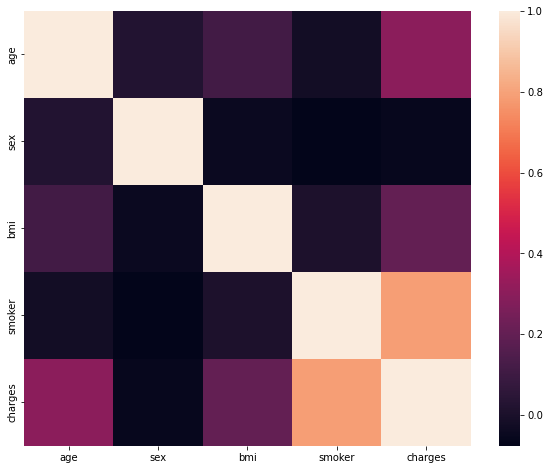

In [32]:
plt.figure(figsize = (10,8))
sns.heatmap(correlacoes)
plt.show()

### 6) Faça um gráfico interativo e dinâmico da distribuição de cobrança para fumantes e não-fumantes 
dica: o nome da função na biblioteca é ```.box()```

In [33]:
### SEU CÓDIGO COMEÇA AQUI ###
fig = px.box(data, x = 'smoker', y = 'charges', color='smoker', 
             title = 'Boxplot da distribuição de cobrança para fumantes e não-fumantes',
            labels = {'charges': 'Cobrança do plano de saúde', 'smoker': 'Fumante ou não-fumante'})
fig.show()